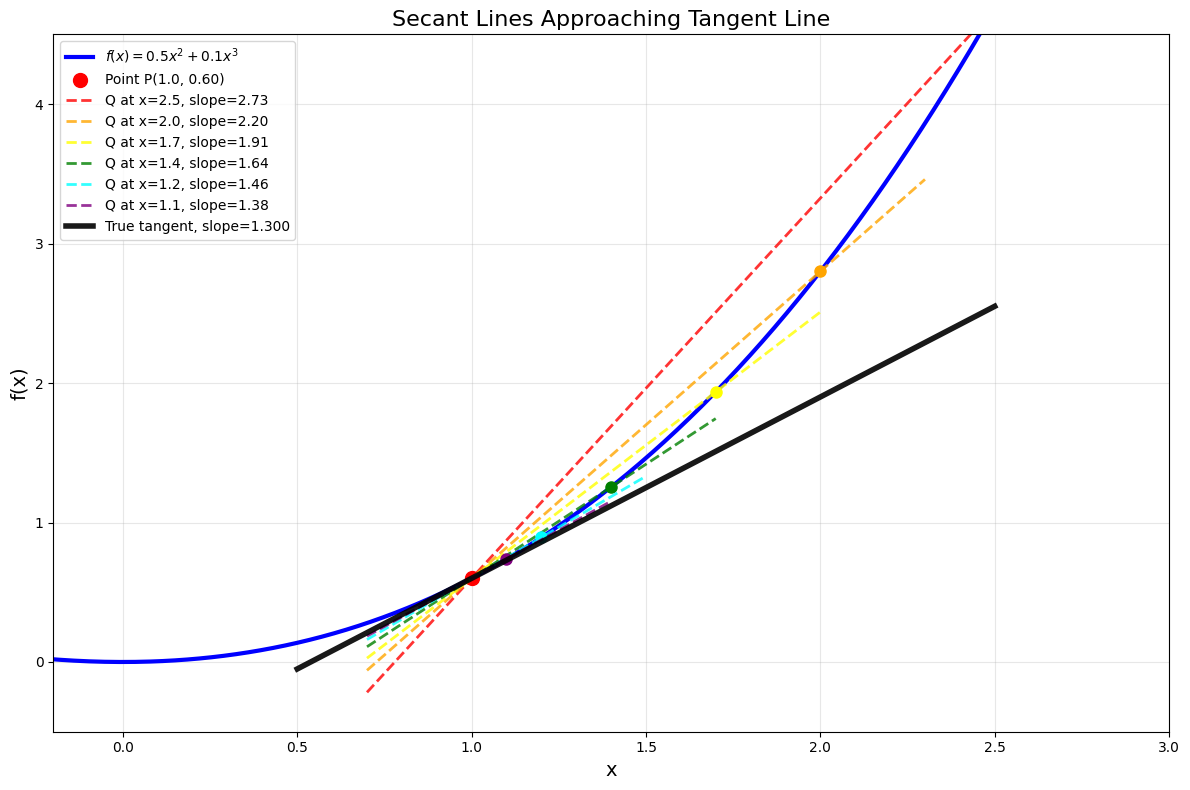

Key Observations:
1. As point Q approaches point P, secant lines get closer to the tangent line
2. The slopes of secant lines converge to the derivative value
3. The tangent line represents the instantaneous rate of change at point P


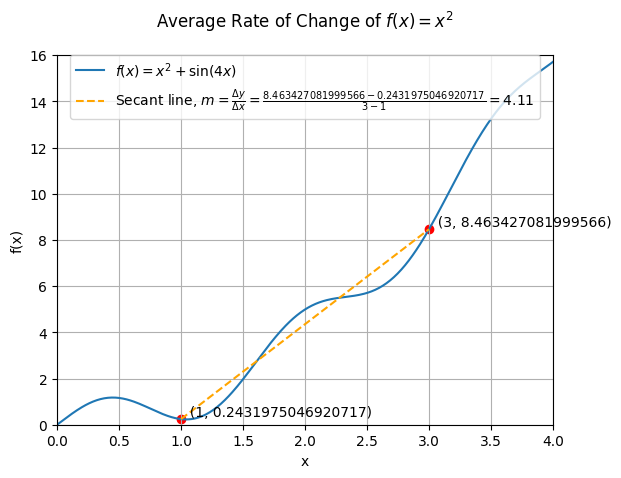

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and points
def f(x): 
    return x**2 + np.sin(4*x)

x0, x1 = 1, 3
y0, y1 = f(x0), f(x1)
m = (y1 - y0) / (x1 - x0)  # average rate of change

# Plot the curve
xs = np.linspace(0, 4, 400)
plt.plot(xs, f(xs), label=r'$f(x)=x^2 + \sin(4x)$')

# Plot the two points
plt.scatter([x0, x1], [y0, y1], color='red')
plt.text(x0, y0,   f'  ({x0}, {y0})', va='bottom')
plt.text(x1, y1,   f'  ({x1}, {y1})', va='bottom')

# Plot the secant line
secant_x = np.array([x0, x1])
secant_y = y0 + m*(secant_x - x0)
plt.plot(secant_x, secant_y, '--', color='orange',
         label=rf'Secant line, $m=\frac{{\Delta y}}{{\Delta x}}=\frac{{{y1}-{y0}}}{{{x1}-{x0}}}={m:.2f}$')

# Annotations and styling
plt.title('Average Rate of Change of $f(x)=x^2$', pad=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axis([0, 4, 0, 16])

# Save or show
plt.savefig('figures/avg_rate_of_change.png', dpi=150)
plt.show()

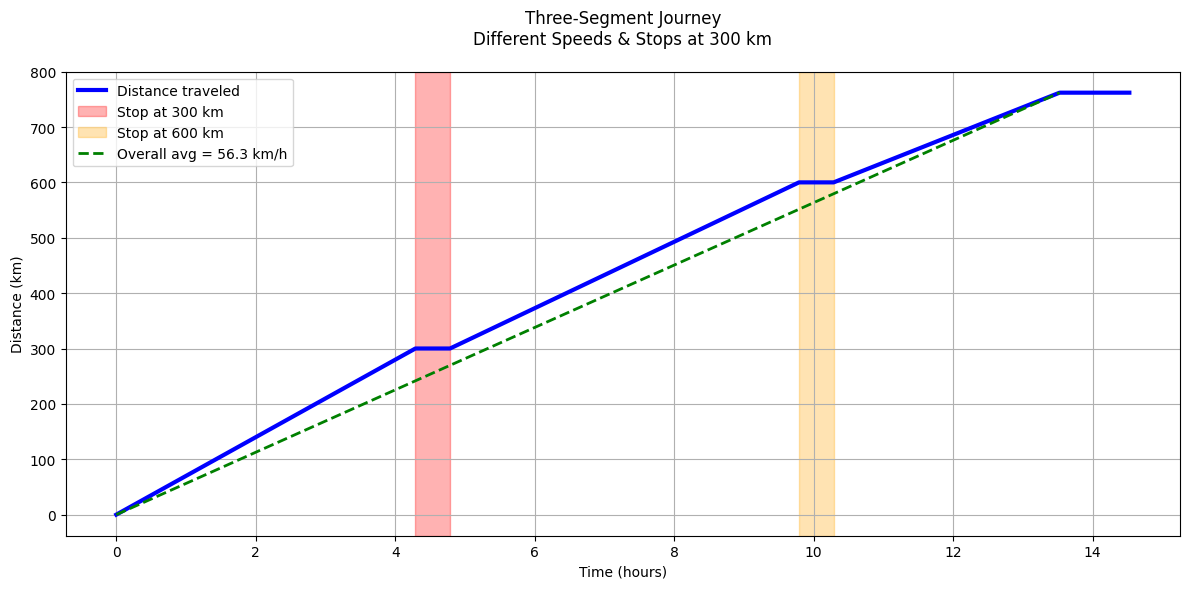

Leg1: 70 km/h, Leg2: 60 km/h, Leg3: 50 km/h
Total time (incl. stops): 13.53 hrs, Overall avg: 56.3 km/h


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for a 762 km journey with 30 min stops every 300 km
total_distance = 762
leg1_dist = 300
leg2_dist = 300
leg3_dist = total_distance - leg1_dist - leg2_dist

v1, v2, v3 = 70, 60, 50  # speeds (km/h) for each leg
rest_dur = 0.5  # hours of stop

# Compute time thresholds
t1 = leg1_dist / v1
t2 = t1 + rest_dur + leg2_dist / v2
t3 = t2 + rest_dur + leg3_dist / v3

def distance_function(t):
    if t <= t1:
        return v1 * t
    elif t <= t1 + rest_dur:
        return leg1_dist
    elif t <= t2:
        return leg1_dist + v2 * (t - t1 - rest_dur)
    elif t <= t2 + rest_dur:
        return leg1_dist + leg2_dist
    elif t <= t3:
        return leg1_dist + leg2_dist + v3 * (t - t2 - rest_dur)
    else:
        return total_distance

# Generate data
time_points = np.linspace(0, t3 + 1, 1200)
distances = [distance_function(t) for t in time_points]

# Plot journey with three slopes
plt.figure(figsize=(12, 6))
plt.plot(time_points, distances, 'b-', linewidth=3, label='Distance traveled')

# Shade rest periods
plt.axvspan(t1, t1 + rest_dur, alpha=0.3, color='red', label='Stop at 300 km')
plt.axvspan(t2, t2 + rest_dur, alpha=0.3, color='orange', label='Stop at 600 km')

# Overall average speed line
t_start, t_end = 0, t3
d_start, d_end = distance_function(t_start), distance_function(t_end)
avg_speed = (d_end - d_start) / (t_end - t_start)
plt.plot([t_start, t_end], [d_start, d_end], 'g--', linewidth=2,
         label=f'Overall avg = {avg_speed:.1f} km/h')

# Annotations and styling
plt.title('Three-Segment Journey\nDifferent Speeds & Stops at 300 km', pad=20)
plt.xlabel('Time (hours)')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
print(f"Leg1: {v1} km/h, Leg2: {v2} km/h, Leg3: {v3} km/h")
print(f"Total time (incl. stops): {t3:.2f} hrs, Overall avg: {avg_speed:.1f} km/h")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.patches as patches

# Animated version showing secant line approaching tangent
def create_animated_secant_to_tangent():
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Function definition
    def f(x):
        return 0.5 * x**2 + 0.1 * x**3
    
    # Fixed point
    x0 = 1.0
    y0 = f(x0)
    
    # Plot function
    x_vals = np.linspace(-0.5, 3.5, 400)
    y_vals = f(x_vals)
    ax.plot(x_vals, y_vals, 'b-', linewidth=3, label='$f(x) = 0.5x^2 + 0.1x^3$')
    
    # Fixed point P
    point_p = ax.plot(x0, y0, 'ro', markersize=10, label=f'Fixed Point P({x0}, {y0:.2f})')[0]
    
    # Moving point Q and secant line (will be updated in animation)
    point_q, = ax.plot([], [], 'go', markersize=8, label='Moving Point Q')
    secant_line, = ax.plot([], [], 'r--', linewidth=2, label='Secant Line')
    
    # True tangent line
    true_slope = x0 + 0.3 * x0**2  # derivative at x0
    x_tangent = np.linspace(x0 - 0.8, x0 + 1.5, 100)
    y_tangent = y0 + true_slope * (x_tangent - x0)
    ax.plot(x_tangent, y_tangent, 'k-', linewidth=3, alpha=0.7, 
           label=f'Tangent Line (slope = {true_slope:.3f})')
    
    # Text box for displaying current slope
    text_box = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=12,
                      verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xlim(-0.2, 3.2)
    ax.set_ylim(-0.3, 3.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('f(x)', fontsize=14)
    ax.set_title('Animation: Secant Line Approaching Tangent Line', fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    
    def animate(frame):
        # Calculate current x1 position (moving closer to x0)
        # Start from x1 = 3 and approach x1 = x0
        progress = frame / 100.0  # frame goes from 0 to 100
        x1 = x0 + (2.0 - progress * 1.98)  # from x0+2 to x0+0.02
        y1 = f(x1)
        
        # Update moving point Q
        point_q.set_data([x1], [y1])
        
        # Calculate and update secant line
        if abs(x1 - x0) > 1e-10:  # avoid division by zero
            slope = (y1 - y0) / (x1 - x0)
            x_line = np.linspace(x0 - 0.5, x1 + 0.5, 100)
            y_line = y0 + slope * (x_line - x0)
            secant_line.set_data(x_line, y_line)
            
            # Update text with current information
            text_box.set_text(f'Point Q: ({x1:.3f}, {y1:.3f})\\n'
                             f'Secant slope: {slope:.3f}\\n'
                             f'Distance to P: {abs(x1-x0):.3f}\\n'
                             f'Diff from tangent: {abs(slope-true_slope):.3f}')
        
        return point_q, secant_line, text_box
    
    # Create animation
    anim = FuncAnimation(fig, animate, frames=101, interval=100, blit=False, repeat=True)
    
    plt.tight_layout()
    plt.show()
    
    return anim

# Create the animation
print("Creating animation showing secant line approaching tangent line...")
anim = create_animated_secant_to_tangent()

# Save as gif (optional - might take a moment)
# anim.save('figures/secant_to_tangent_animation.gif', writer='pillow', fps=10)

print("\\nKey Concepts Demonstrated:")
print("• As Q approaches P, the secant line rotates toward the tangent line")
print("• The slope values converge to the derivative (limit of difference quotient)")
print("• This visualization shows the geometric meaning of the derivative")